In [1]:
import pandas as pd
from datetime import datetime   
import matplotlib.pyplot as plt   
import matplotlib.font_manager as fm
import numpy as np

In [2]:
font_path = r'C:\Users\user\Desktop\폰트\Seoulnamsan_ttf\서울남산 장체L.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [3]:
df = pd.read_csv('./data/df.csv') #2017-2020 구,연도,월,폐업,영업
cf = pd.read_csv('./data/cfdata.csv') #전체 카페 데이터
closed = pd.read_csv('./data/closed.csv')  #2017-2020 폐업 가게 데이터

In [4]:
date = pd.to_datetime(closed['DCBYMD'],format='%Y-%m-%d')
closed['DCBYMD'] = date

In [6]:
closed_seocho = closed[closed.region=='종로구']
closed_seocho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 3706 to 8337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   157 non-null    int64         
 1   TRDSTATEGBN  157 non-null    int64         
 2   TRDSTATENM   157 non-null    object        
 3   DCBYMD       157 non-null    datetime64[ns]
 4   SITEAREA     157 non-null    object        
 5   RDNWHLADDR   157 non-null    object        
 6   BPLCNM       157 non-null    object        
 7   X            157 non-null    float64       
 8   Y            157 non-null    float64       
 9   region       157 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 13.5+ KB


In [7]:
closed_seocho['closing_year'],closed_seocho['closing_month'] = (closed_seocho['DCBYMD'].dt.year,closed_seocho['DCBYMD'].dt.month)

<ipython-input-7-bb04a95a1d52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_seocho['closing_year'],closed_seocho['closing_month'] = (closed_seocho['DCBYMD'].dt.year,closed_seocho['DCBYMD'].dt.month)


In [8]:
closed_seocho

,Unnamed: 0,TRDSTATEGBN,TRDSTATENM,DCBYMD,SITEAREA,RDNWHLADDR,BPLCNM,X,Y,region,closing_year,closing_month
3706,22640,3,폐업,2018-12-31,6.60,"서울특별시 종로구 종로12길 10, 1층 (관철동)",카페아이엠티 종각피아노거리점,198661.205715,451931.761151,종로구,2018,12
3707,22650,3,폐업,2018-12-06,52.89,"서울특별시 종로구 낙산성곽서길 33, 지상1층 (종로6가)",가비에셀,200685.462623,452398.341689,종로구,2018,12
3708,22686,3,폐업,2018-07-31,9.45,"서울특별시 종로구 종로56길 30, 1층 (숭인동)",카페랑스,201388.117873,452164.707712,종로구,2018,7
3709,22691,3,폐업,2018-12-12,16.00,"서울특별시 종로구 창신6가길 48, 1층 (창신동)",달동네커피공부방,201061.621038,452642.095070,종로구,2018,12
3710,22740,3,폐업,2018-12-28,27.77,"서울특별시 종로구 율곡로3길 72, 1층 (안국동)",꼬리(kkori),198362.448250,452946.646271,종로구,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...
8141,23398,3,폐업,2020-07-08,94.59,"서울특별시 종로구 북촌로 21-10 (재동,1층)",부대남,198570.308394,452943.688554,종로구,2020,7
8334,28845,3,폐업,2020-05-04,63.70,"서울특별시 종로구 옥인길 24, 1층 (옥인동)",스페인하우스,197046.403468,453175.556429,종로구,2020,5
8335,28846,3,폐업,2020-05-04,81.40,서울특별시 종로구 북촌로5길 39 (화동),플러스믹스(+Mix),198403.215745,453004.756341,종로구,2020,5
8336,28847,3,폐업,2020-04-17,182.27,"서울특별시 종로구 사직로8길 5 (필운동,(1,2층))",레더라 경희궁점,197236.599536,452571.994760,종로구,2020,4


In [9]:
closing_year_month = closed_seocho.groupby(['closing_year','closing_month']).size()
closing_year_month

closing_year  closing_month
2018          7                 1
              12                6
2019          1                 4
              2                 5
              3                 6
              4                 9
              5                 6
              6                 4
              7                 9
              8                 4
              9                 7
              10                8
              11                4
              12                7
2020          1                 4
              2                 5
              3                 6
              4                 5
              5                 9
              6                 3
              7                 6
              8                 4
              9                 4
              10                8
              11                5
              12               18
dtype: int64

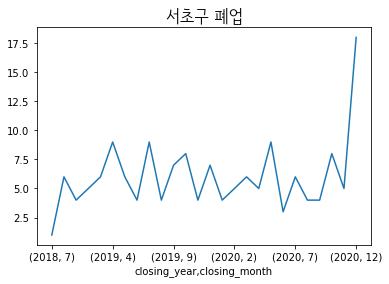

In [10]:
fig, ax = plt.subplots()
ax = closing_year_month.plot()
plt.title('서초구 폐업',fontproperties=fontprop)
plt.show()

In [136]:
closed_gangnam = closed[closed.region=='강남구']
closed_gangnam['closing_year'],closed_gangnam['closing_month'] = (closed_gangnam['DCBYMD'].dt.year,closed_gangnam['DCBYMD'].dt.month)
closing_year_month = closed_gangnam.groupby(['closing_year','closing_month']).size()
closing_year_month

<ipython-input-136-c391710ae229>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_gangnam['closing_year'],closed_gangnam['closing_month'] = (closed_gangnam['DCBYMD'].dt.year,closed_gangnam['DCBYMD'].dt.month)


closing_year  closing_month
2017          1                23
              2                12
              3                30
              4                19
              5                31
              6                25
              7                30
              8                30
              9                31
              10               19
              11               18
              12               32
2018          1                23
              2                21
              3                30
              4                30
              5                40
              6                27
              7                27
              8                24
              9                27
              10               29
              11               39
              12               31
2019          1                26
              2                18
              3                27
              4                27
              5     

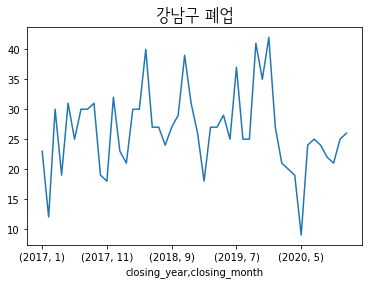

In [137]:
fig, ax = plt.subplots()
ax = closing_year_month.plot()
plt.title('강남구 폐업',fontproperties=fontprop)
plt.show()

In [171]:
closed_dongjak = closed[closed.region=='동작구']
closed_dongjak['closing_year'],closed_dongjak['closing_month'] = (closed_dongjak['DCBYMD'].dt.year,closed_dongjak['DCBYMD'].dt.month)
closing_year_month = closed_dongjak.groupby(['closing_year','closing_month']).size()
closing_year_month

<ipython-input-171-8dd01523f6da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_dongjak['closing_year'],closed_dongjak['closing_month'] = (closed_dongjak['DCBYMD'].dt.year,closed_dongjak['DCBYMD'].dt.month)


closing_year  closing_month
2017          1                 4
              2                 4
              3                 4
              4                 6
              5                 4
              6                13
              7                 4
              8                 4
              9                 3
              10                5
              11                3
              12                3
2018          1                 1
              2                 3
              3                 5
              4                10
              5                 4
              6                 2
              7                 8
              8                 2
              9                 2
              10                3
              11                4
              12                6
2019          1                 5
              2                 3
              3                 2
              4                 5
              5     

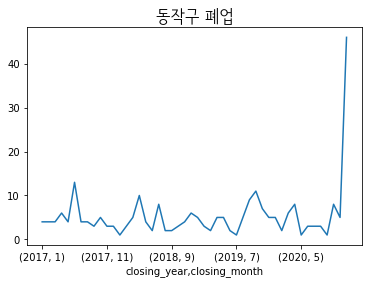

In [172]:
fig, ax = plt.subplots()
ax = closing_year_month.plot()
plt.title('동작구 폐업',fontproperties=fontprop)
plt.show()

In [173]:
closed_mapo = closed[closed.region=='마포구']
closed_mapo['closing_year'],closed_mapo['closing_month'] = (closed_mapo['DCBYMD'].dt.year,closed_mapo['DCBYMD'].dt.month)
closing_year_month = closed_mapo.groupby(['closing_year','closing_month']).size()
closing_year_month

<ipython-input-173-83c535dd5b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_mapo['closing_year'],closed_mapo['closing_month'] = (closed_mapo['DCBYMD'].dt.year,closed_mapo['DCBYMD'].dt.month)


closing_year  closing_month
2017          1                21
              2                21
              3                20
              4                29
              5                22
              6                24
              7                21
              8                24
              9                 9
              10               15
              11               19
              12               20
2018          1                27
              2                22
              3                18
              4                27
              5                25
              6                20
              7                17
              8                20
              9                22
              10               19
              11               16
              12               26
2019          1                16
              2                16
              3                13
              4                13
              5     

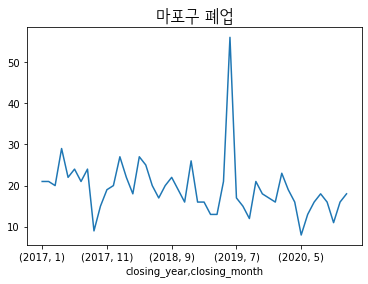

In [174]:
fig, ax = plt.subplots()
ax = closing_year_month.plot()
plt.title('마포구 폐업',fontproperties=fontprop)
plt.show()

In [175]:
closed_ydp = closed[closed.region=='영등포구']
closed_ydp['closing_year'],closed_ydp['closing_month'] = (closed_ydp['DCBYMD'].dt.year,closed_ydp['DCBYMD'].dt.month)
closing_year_month = closed_ydp.groupby(['closing_year','closing_month']).size()
closing_year_month

<ipython-input-175-b30ad681cb7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_ydp['closing_year'],closed_ydp['closing_month'] = (closed_ydp['DCBYMD'].dt.year,closed_ydp['DCBYMD'].dt.month)


closing_year  closing_month
2017          1                 9
              2                 6
              3                12
              4                 5
              5                11
              6                 8
              7                 2
              8                 8
              9                12
              10                7
              11               16
              12                3
2018          1                 7
              2                 6
              3                 4
              4                 6
              5                 4
              6                 6
              7                 7
              8                 8
              9                 3
              10                8
              11                7
              12               12
2019          1                22
              2                22
              3                 9
              4                 9
              5     

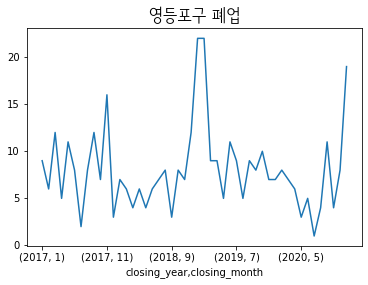

In [176]:
fig, ax = plt.subplots()
ax = closing_year_month.plot()
plt.title('영등포구 폐업',fontproperties=fontprop)
plt.show()

In [138]:
df.iloc[:,1:]

,구,연도,월,폐업,영업
0,용산구,2017,1,6,970
1,용산구,2017,2,3,967
2,용산구,2017,3,5,962
3,용산구,2017,4,6,956
4,용산구,2017,5,8,948
...,...,...,...,...,...
1195,노원구,2020,8,5,853
1196,노원구,2020,9,3,850
1197,노원구,2020,10,3,847
1198,노원구,2020,11,8,839


In [142]:
df_seocho = df[df['구']=='서초구'].sort_values(['월']).iloc[:,1:]
df_seocho_2017 = df_seocho[df['연도']==2017].sort_values(['월']).iloc[:,1:]
df_seocho_2018= df_seocho[df['연도']==2018].sort_values(['월']).iloc[:,1:]
df_seocho_2019= df_seocho[df['연도']==2019].sort_values(['월']).iloc[:,1:]
df_seocho_2020= df_seocho[df['연도']==2020].sort_values(['월']).iloc[:,1:]

<ipython-input-142-7b21387800d8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_seocho_2017 = df_seocho[df['연도']==2017].sort_values(['월']).iloc[:,1:]
<ipython-input-142-7b21387800d8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_seocho_2018= df_seocho[df['연도']==2018].sort_values(['월']).iloc[:,1:]
<ipython-input-142-7b21387800d8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_seocho_2019= df_seocho[df['연도']==2019].sort_values(['월']).iloc[:,1:]
<ipython-input-142-7b21387800d8>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_seocho_2020= df_seocho[df['연도']==2020].sort_values(['월']).iloc[:,1:]


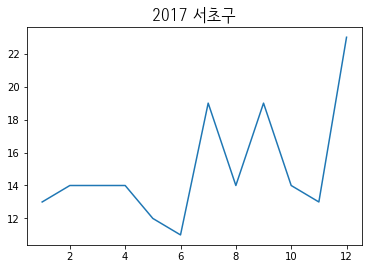

In [126]:
fig, ax = plt.subplots()
plt.plot(df_seocho_2017['월'],df_seocho_2017['폐업'])
plt.title('2017 서초구',fontproperties=fontprop)
plt.show()

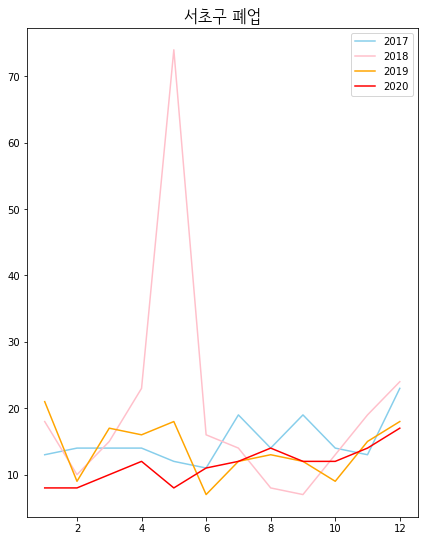

In [167]:
fig = plt.figure(figsize = (7, 9))
plt.plot(df_seocho_2017['월'],df_seocho_2017['폐업'],color='skyblue',label='2017')
plt.plot(df_seocho_2018['월'],df_seocho_2018['폐업'],color='pink',label='2018')
plt.plot(df_seocho_2019['월'],df_seocho_2019['폐업'],color='orange',label='2019')
plt.plot(df_seocho_2020['월'],df_seocho_2020['폐업'],color='red',label='2020')
plt.legend(loc='upper right')
plt.title('서초구 폐업',fontproperties=fontprop)
plt.show()

In [158]:
df_gangnam = df[df['구']=='강남구'].sort_values(['월']).iloc[:,1:]
df_gangnam_2017 = df_gangnam[df['연도']==2017].sort_values(['월']).iloc[:,1:]
df_gangnam_2018= df_gangnam[df['연도']==2018].sort_values(['월']).iloc[:,1:]
df_gangnam_2019= df_gangnam[df['연도']==2019].sort_values(['월']).iloc[:,1:]
df_gangnam_2020= df_gangnam[df['연도']==2020].sort_values(['월']).iloc[:,1:]

<ipython-input-158-d8d739a6971e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gangnam_2017 = df_gangnam[df['연도']==2017].sort_values(['월']).iloc[:,1:]
<ipython-input-158-d8d739a6971e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gangnam_2018= df_gangnam[df['연도']==2018].sort_values(['월']).iloc[:,1:]
<ipython-input-158-d8d739a6971e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gangnam_2019= df_gangnam[df['연도']==2019].sort_values(['월']).iloc[:,1:]
<ipython-input-158-d8d739a6971e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gangnam_2020= df_gangnam[df['연도']==2020].sort_values(['월']).iloc[:,1:]


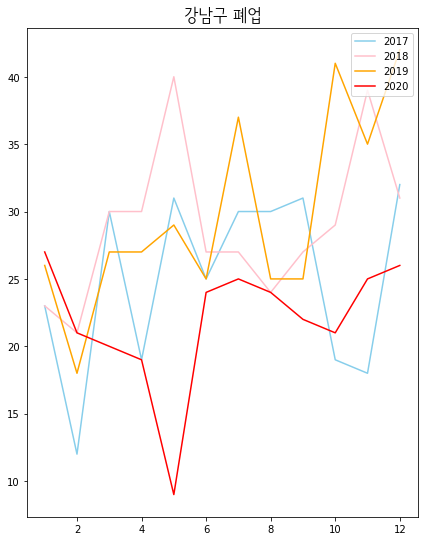

In [168]:
fig = plt.figure(figsize = (7, 9))
plt.plot(df_gangnam_2017['월'],df_gangnam_2017['폐업'],color='skyblue',label='2017')
plt.plot(df_gangnam_2018['월'],df_gangnam_2018['폐업'],color='pink',label='2018')
plt.plot(df_gangnam_2019['월'],df_gangnam_2019['폐업'],color='orange',label='2019')
plt.plot(df_gangnam_2020['월'],df_gangnam_2020['폐업'],color='red',label='2020')
plt.legend(loc='upper right')
plt.title('강남구 폐업',fontproperties=fontprop)
plt.show()

In [160]:
df_dongjak = df[df['구']=='동작구'].sort_values(['월']).iloc[:,1:]
df_dongjak_2017 = df_dongjak[df['연도']==2017].sort_values(['월']).iloc[:,1:]
df_dongjak_2018= df_dongjak[df['연도']==2018].sort_values(['월']).iloc[:,1:]
df_dongjak_2019= df_dongjak[df['연도']==2019].sort_values(['월']).iloc[:,1:]
df_dongjak_2020= df_dongjak[df['연도']==2020].sort_values(['월']).iloc[:,1:]

<ipython-input-160-46c090277569>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dongjak_2017 = df_dongjak[df['연도']==2017].sort_values(['월']).iloc[:,1:]
<ipython-input-160-46c090277569>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dongjak_2018= df_dongjak[df['연도']==2018].sort_values(['월']).iloc[:,1:]
<ipython-input-160-46c090277569>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dongjak_2019= df_dongjak[df['연도']==2019].sort_values(['월']).iloc[:,1:]
<ipython-input-160-46c090277569>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dongjak_2020= df_dongjak[df['연도']==2020].sort_values(['월']).iloc[:,1:]


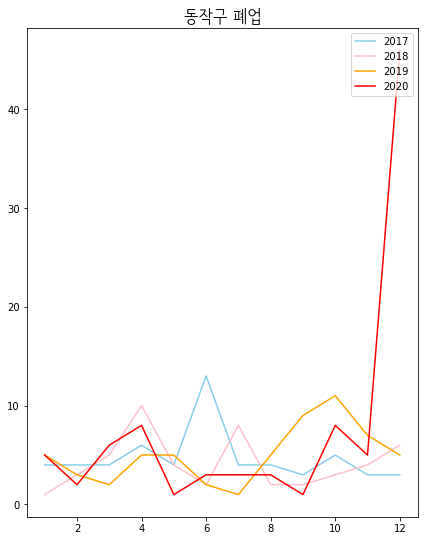

In [169]:
fig = plt.figure(figsize = (7, 9))
plt.plot(df_dongjak_2017['월'],df_dongjak_2017['폐업'],color='skyblue',label='2017')
plt.plot(df_dongjak_2018['월'],df_dongjak_2018['폐업'],color='pink',label='2018')
plt.plot(df_dongjak_2019['월'],df_dongjak_2019['폐업'],color='orange',label='2019')
plt.plot(df_dongjak_2020['월'],df_dongjak_2020['폐업'],color='red',label='2020')
plt.legend(loc='upper right')
plt.title('동작구 폐업',fontproperties=fontprop)
plt.show()

In [162]:
df_mapo = df[df['구']=='마포구'].sort_values(['월']).iloc[:,1:]
df_mapo_2017 = df_mapo[df['연도']==2017].sort_values(['월']).iloc[:,1:]
df_mapo_2018= df_mapo[df['연도']==2018].sort_values(['월']).iloc[:,1:]
df_mapo_2019= df_mapo[df['연도']==2019].sort_values(['월']).iloc[:,1:]
df_mapo_2020= df_mapo[df['연도']==2020].sort_values(['월']).iloc[:,1:]

<ipython-input-162-351727a16736>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mapo_2017 = df_mapo[df['연도']==2017].sort_values(['월']).iloc[:,1:]
<ipython-input-162-351727a16736>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mapo_2018= df_mapo[df['연도']==2018].sort_values(['월']).iloc[:,1:]
<ipython-input-162-351727a16736>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mapo_2019= df_mapo[df['연도']==2019].sort_values(['월']).iloc[:,1:]
<ipython-input-162-351727a16736>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mapo_2020= df_mapo[df['연도']==2020].sort_values(['월']).iloc[:,1:]


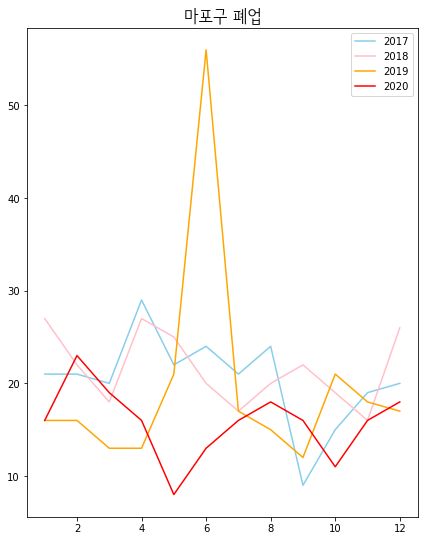

In [170]:
fig = plt.figure(figsize = (7, 9))
plt.plot(df_mapo_2017['월'],df_mapo_2017['폐업'],color='skyblue',label='2017')
plt.plot(df_mapo_2018['월'],df_mapo_2018['폐업'],color='pink',label='2018')
plt.plot(df_mapo_2019['월'],df_mapo_2019['폐업'],color='orange',label='2019')
plt.plot(df_mapo_2020['월'],df_mapo_2020['폐업'],color='red',label='2020')
plt.legend(loc='upper right')
plt.title('마포구 폐업',fontproperties=fontprop)
plt.show()

In [164]:
df_ydp = df[df['구']=='영등포구'].sort_values(['월']).iloc[:,1:]
df_ydp_2017 = df_ydp[df['연도']==2017].sort_values(['월']).iloc[:,1:]
df_ydp_2018= df_ydp[df['연도']==2018].sort_values(['월']).iloc[:,1:]
df_ydp_2019= df_ydp[df['연도']==2019].sort_values(['월']).iloc[:,1:]
df_ydp_2020= df_ydp[df['연도']==2020].sort_values(['월']).iloc[:,1:]

<ipython-input-164-a4bbe384e1d1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ydp_2017 = df_ydp[df['연도']==2017].sort_values(['월']).iloc[:,1:]
<ipython-input-164-a4bbe384e1d1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ydp_2018= df_ydp[df['연도']==2018].sort_values(['월']).iloc[:,1:]
<ipython-input-164-a4bbe384e1d1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ydp_2019= df_ydp[df['연도']==2019].sort_values(['월']).iloc[:,1:]
<ipython-input-164-a4bbe384e1d1>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ydp_2020= df_ydp[df['연도']==2020].sort_values(['월']).iloc[:,1:]


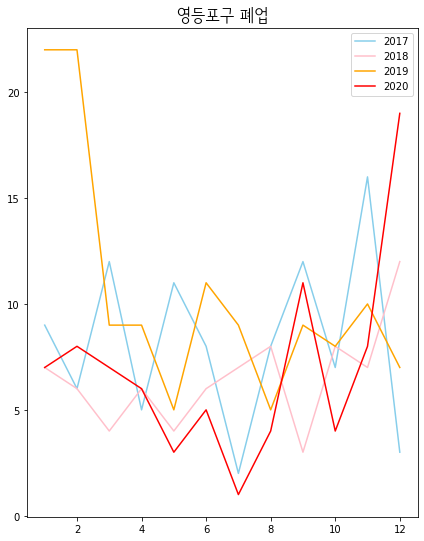

In [166]:
fig = plt.figure(figsize = (7, 9))
plt.plot(df_ydp_2017['월'],df_ydp_2017['폐업'],color='skyblue',label='2017')
plt.plot(df_ydp_2018['월'],df_ydp_2018['폐업'],color='pink',label='2018')
plt.plot(df_ydp_2019['월'],df_ydp_2019['폐업'],color='orange',label='2019')
plt.plot(df_ydp_2020['월'],df_ydp_2020['폐업'],color='red',label='2020')
plt.legend(loc='upper right')
plt.title('영등포구 폐업',fontproperties=fontprop)
plt.show()